**Machine Learning Venue and Date Predicitions**<br>

I'm working more with the phanalytix.1.csv dataset to explore more of machine learning. Since this dataset has over 30883 entries, I'm going to work with the RandomForest Classifier because it is a powerful model for complex patterns and relationships. 
This is my plan of attack:<br>

Random Forest is a good machine-learning technique for this dataset for several reasons:

Handling complex relationships: Random Forest can handle complex relationships between features and the target variable. It can capture non-linear patterns and interactions among features, making it suitable for datasets with intricate relationships.

Robust to outliers and noise: Random Forest is robust to outliers and noise in the dataset. It constructs multiple decision trees and combines their predictions, reducing the impact of individual noisy or outlier data points.

Feature importance: Random Forest measures feature importance, indicating which features contribute most to the prediction. This can help in feature selection and understanding the underlying factors driving the predictions.

Handling high-dimensional data: Random Forest can handle datasets with many features without the need for feature selection or dimensionality reduction techniques. It automatically selects a subset of features at each split, reducing the risk of overfitting and improving computational efficiency.

Handling imbalanced classes: Random Forest can handle imbalanced class distributions by assigning weights to the samples or using techniques like SMOTE for oversampling. This is beneficial when dealing with datasets where the target variable is skewed towards one class.

Generalization and avoidance of overfitting: Random Forest uses ensemble learning, combining multiple decision trees, which helps in generalization and reduces overfitting. It achieves this by aggregating predictions from different trees, reducing the variance, and improving the model's ability to generalize to unseen data.

Easy to use and interpret: Random Forest is relatively easy to use, and its predictions can be analyzed based on feature importance. It doesn't require extensive parameter tuning and can provide good results with default settings.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('phanalytix.1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30883 entries, 0 to 30882
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song                30883 non-null  object 
 1   date                30883 non-null  object 
 2   position            30883 non-null  int64  
 3   set                 30883 non-null  object 
 4   set_name            30883 non-null  object 
 5   location            30883 non-null  object 
 6   venue_name          30883 non-null  object 
 7   tour                30883 non-null  object 
 8   ratings             30883 non-null  float64
 9   duration_song       30880 non-null  object 
 10  like_count_song     30883 non-null  int64  
 11  like_count_show     30883 non-null  int64  
 12  artist              30883 non-null  object 
 13  total_times_played  30883 non-null  float64
 14  debut               30883 non-null  object 
 15  year                30883 non-null  float64
 16  note

In [4]:
df.describe()

,position,ratings,like_count_song,like_count_show,total_times_played,year,cover_dummy,latitude,longitude
count,30883.000000,30883.000000,30883.000000,30883.000000,30883.000000,30883.000000,30883.000000,30883.000000,30883.000000
mean,11.366869,3.828554,1.059094,7.208626,228.513329,1998.448208,0.239808,40.187546,-81.991096
std,6.899126,0.572210,3.579589,12.288515,157.438059,8.634524,0.426973,4.658715,28.958498
min,1.000000,1.166700,0.000000,0.000000,0.000000,1983.000000,0.000000,20.553629,-124.163673
25%,6.000000,3.458300,0.000000,1.000000,89.000000,1992.000000,0.000000,37.774929,-90.071532
50%,11.000000,3.882400,0.000000,3.000000,210.000000,1995.000000,0.000000,40.712784,-78.638179
75%,16.000000,4.260300,1.000000,10.000000,349.000000,2004.000000,0.000000,42.963360,-73.510126
max,51.000000,4.738300,138.000000,170.000000,603.000000,2017.000000,1.000000,55.676097,139.817410


In [5]:
df.head(5)

,song,date,position,set,set_name,location,venue_name,tour,ratings,duration_song,...,artist,total_times_played,debut,year,notes,cover_dummy,city,country,latitude,longitude
0,scarlet begonias,1983-12-02,1,2,set 2,"burlington, vt","harris-millis cafeteria, university of vermont",1983 tour,4.2128,09:18,...,grateful dead,3.000000,1983-12-02,1983.0,phish debut,1,burlington,united states,44.475882,-73.212072
1,fire on the mountain,1983-12-02,2,2,set 2,"burlington, vt","harris-millis cafeteria, university of vermont",1983 tour,4.2128,07:53,...,diga rhythm band,2.000000,1983-12-02,1983.0,phish debut,1,burlington,united states,44.475882,-73.212072
2,in the midnight hour,1984-11-03,1,1,set 1,"burlington, vt","slade hall, university of vermont",1984 tour,3.2963,06:23,...,wilson pickett,5.000000,1983-12-02,1984.0,NaN,1,burlington,united states,44.475882,-73.212072
3,wild child > jam,1984-11-03,2,1,set 1,"burlington, vt","slade hall, university of vermont",1984 tour,3.2963,05:20,...,phish,228.513329,1984.0,1984.0,phish debut,1,burlington,united states,44.475882,-73.212072
4,bertha > st. stephen,1984-11-03,3,1,set 1,"burlington, vt","slade hall, university of vermont",1984 tour,3.2963,13:39,...,phish,228.513329,1984.0,1984.0,phish debut,1,burlington,united states,44.475882,-73.212072


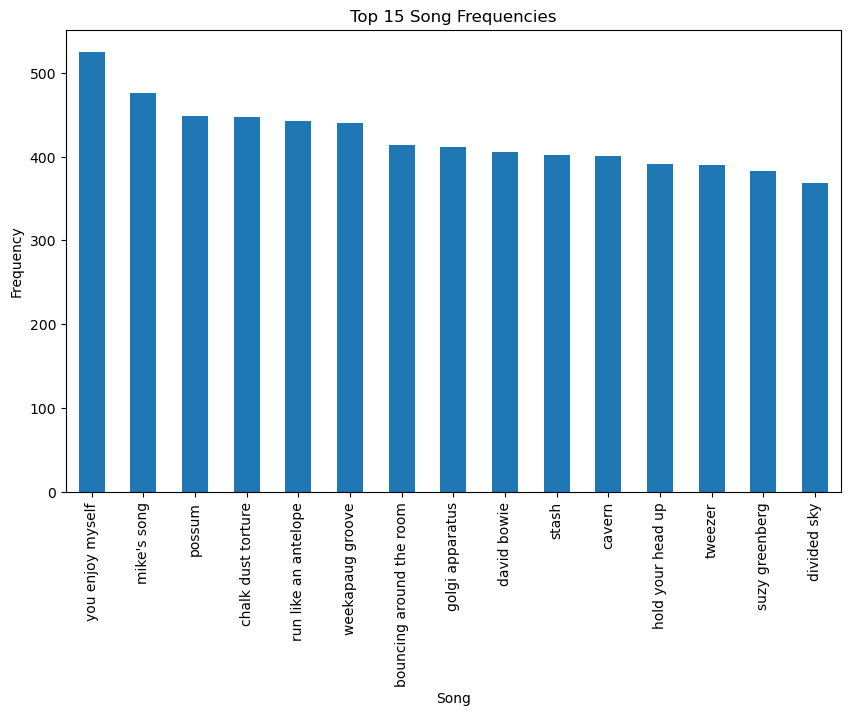

In [6]:
# Calculate song frequencies  
song_counts = df['song'].value_counts().head(15)

# Plot bar chart of song frequencies  
song_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Song')
plt.ylabel('Frequency')
plt.title('Top 15 Song Frequencies')
plt.show()

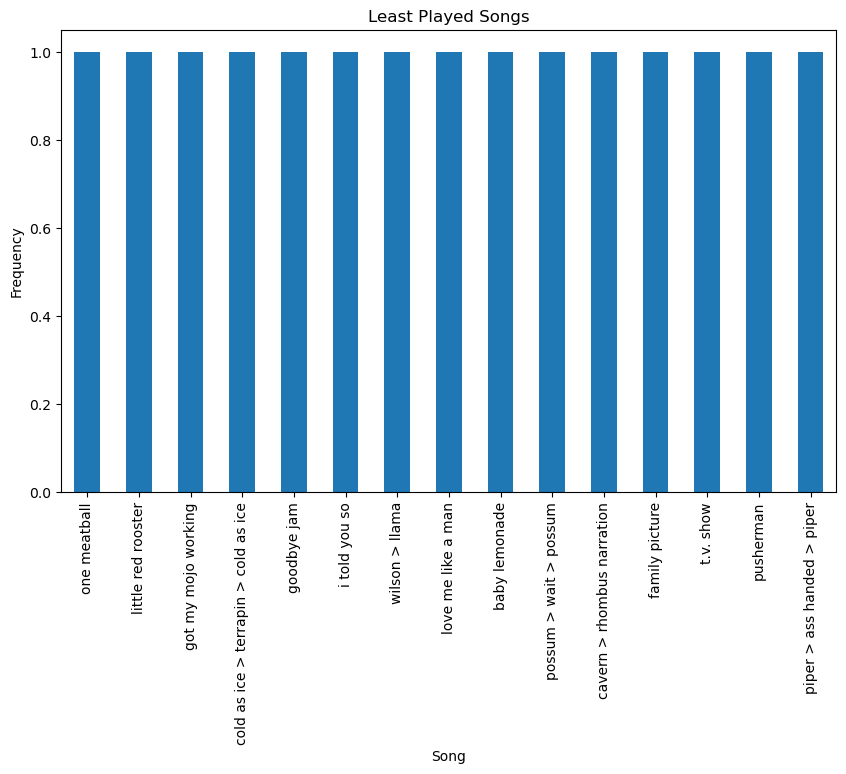

In [7]:
# Calculate song frequencies  
song_counts = df['song'].value_counts().tail(15)

# Plot bar chart of song frequencies  
song_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Song')
plt.ylabel('Frequency')
plt.title('Least Played Songs')
plt.show()

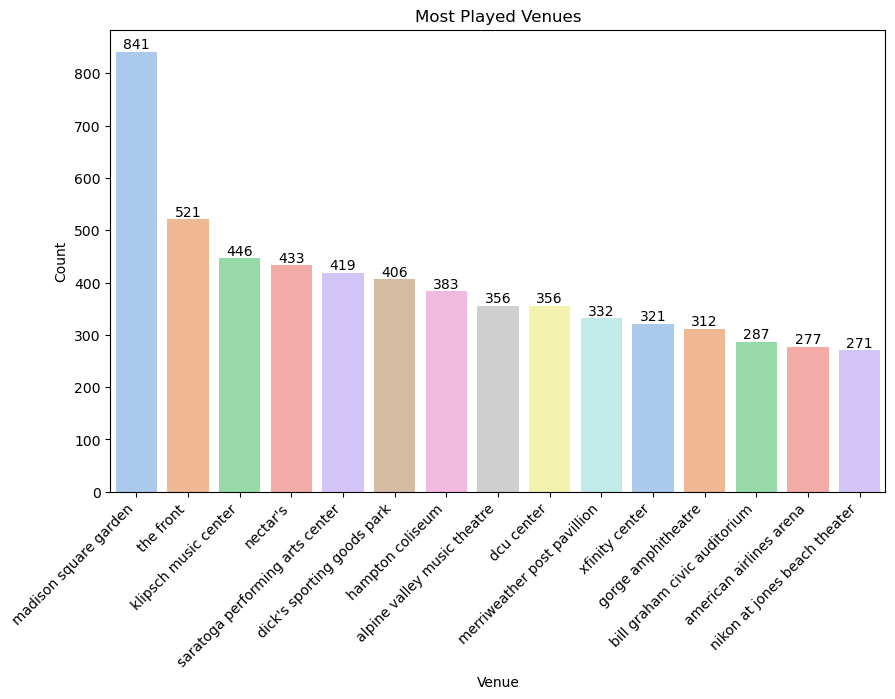

In [8]:
import seaborn as sns

# Calculate venue frequencies  
venue_counts = df['venue_name'].value_counts().head(15)

# Set a fun color palette  
colors = sns.color_palette('pastel')

# Plot bar chart of venue frequencies  
plt.figure(figsize=(10, 6))
sns.barplot(x=venue_counts.index, y=venue_counts.values, palette=colors)
plt.xlabel('Venue')
plt.ylabel('Count')
plt.title('Most Played Venues')
plt.xticks(rotation=45, ha='right')
for i, count in enumerate(venue_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

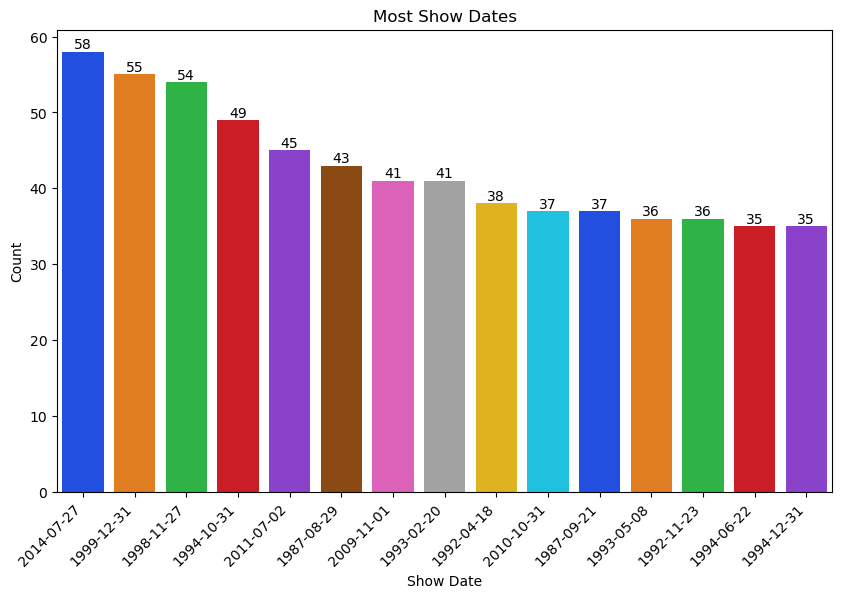

In [9]:
# Calculate show date frequencies  
date_counts = df['date'].value_counts().head(15)

# Set a fun color palette  
colors = sns.color_palette('bright')

# Plot bar chart of show date frequencies  
plt.figure(figsize=(10, 6))
sns.barplot(x=date_counts.index, y=date_counts.values, palette=colors)
plt.xlabel('Show Date')
plt.ylabel('Count')
plt.title('Most Show Dates')
plt.xticks(rotation=45, ha='right')
for i, count in enumerate(date_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

Encoding Categorical Variables <br>
Convert categorical variables, such as "song," "set," "set_name," "location," "venue_name," "tour," "artist," "debut," "notes," "city," and "country," into numerical representations using techniques like label encoding. This step ensures that the classifier can work with these variables effectively.

In [10]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import LabelEncoder

In [11]:
# Preprocess the data  
encoder = LabelEncoder()
df['venue_name_encoded'] = encoder.fit_transform(df['venue_name'])
df['date'] = pd.to_datetime(df['date'])
df['date_encoded'] = df['date'].dt.strftime('%Y%m%d').astype(int)

In [12]:
# Split the data into training and testing sets  
X = df[['venue_name_encoded', 'date_encoded']]
y_venue = df['venue_name']
y_date = df['date']
X_train, X_test, y_venue_train, y_venue_test, y_date_train, y_date_test = train_test_split(X, y_venue, y_date, test_size=0.2, random_state=42)

X represents the feature matrix, which consists of the columns 'venue_name_encoded' and 'date_encoded'. These columns contain the encoded representations of the venue names and dates.

y_venue represents the target variable for the venue prediction, and y_date represents the target variable for the date prediction.

By using train_test_split with the specified parameters, you have split X, y_venue, and y_date into training and testing sets. The training set will be used to train the model, while the testing set will be used to evaluate its performance.

The resulting variables X_train, X_test, y_venue_train, y_venue_test, y_date_train, and y_date_test contain the respective portions of the data for training and testing.

In [13]:
# Create and train the model for venue prediction  
venue_model = RandomForestClassifier()
venue_model.fit(X_train, y_venue_train)

RandomForestClassifier()

In [14]:
# Predict future venues and dates  
future_data = pd.DataFrame({
    'venue_name_encoded': [-1],
    'date_encoded': [int(pd.to_datetime('2017-01-01').strftime('%Y%m%d'))]
})
predicted_venue = venue_model.predict(future_data)
predicted_date = venue_model.predict(future_data)

In [15]:
# Print the predicted result  
print('Predicted Venue:', predicted_venue[0])

if pd.notnull(predicted_date[0]):
    formatted_date = pd.to_datetime(str(predicted_date[0]), format='%Y%m%d', errors='coerce').strftime('%Y-%m-%d')
    print('Predicted Date:', formatted_date)
else:
    print('Predicted Date: Not Available')

Predicted Venue: 1stbank center


ValueError: NaTType does not support strftime

looks like this the predicted Venue for the next shows will be the 1stbank center, however, since this data is dated from 2017 and the 1stbankcenter is no longer the 1stbankcenter, I highly doubt that this will be the case. <br>

Let's try to optimize this result

In [16]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import train_test_split

In [17]:
# Split the data into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y_venue, test_size=0.2, random_state=42)

In [18]:
# Define a set of hyperparameters to try  
hyperparameters = {
    'n_estimators': 100,
    'max_depth': 5,
    'min_samples_split': 2,
    'max_features': 'auto'
}

In [19]:
# Create the Random Forest classifier with the chosen hyperparameters  
rf = RandomForestClassifier(**hyperparameters)

In [20]:
# Train the model  
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='auto')

In [21]:
# Make predictions on the test set  
y_pred = rf.predict(X_test)

In [22]:
# Evaluate the model's performance  
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.18568884571798608


18.5% Accuracy is not great. Let's try again. 

Support Vector Machine (SVM) can be effective in handling complex decision boundaries and can perform well in various scenarios.

In [23]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import train_test_split

In [24]:
# Split the data into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y_venue, test_size=0.2, random_state=42)

In [25]:
# Define the hyperparameters for the SVM classifier  
hyperparameters = {
    'C': 1.0,
    'kernel': 'rbf',
    'gamma': 'scale'
}

In [26]:
# Create the SVM classifier with the specified hyperparameters  
svm = SVC(**hyperparameters)

In [27]:
# Train the model  
svm.fit(X_train, y_train)

SVC()

In [28]:
# Make predictions on the test set  
y_pred = svm.predict(X_test)

In [29]:
# Evaluate the model's performance  
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.027035777885705034


This, too, performed horribly. <br>

**When dealing with imbalanced data, there are several approaches to consider to address the issue.** <br>

Data Imbalance Check: It's important first to check the extent of data imbalance in your dataset. To do this, calculate the class distribution, i.e., the number of samples in each class. This will give you an idea of how imbalanced your data is. Then, visualize the class distribution using a bar plot or calculate the class imbalance ratio. <br>

Data Augmentation: Data augmentation is a technique used to artificially increase the number of samples in the minority class by creating synthetic samples. This can help balance the class distribution and improve the model's ability to learn from the minority class. Data augmentation techniques include oversampling and undersampling. <br>

Oversampling: Oversampling techniques generate synthetic samples for the minority class to match the number of samples in the majority class.  <br>

Undersampling: Undersampling techniques reduce the number of samples in the majority class to match the number of samples in the minority class. Random undersampling is a simple technique that randomly removes samples from the majority class until the class distribution is balanced.

In [30]:
from sklearn.metrics import accuracy_score, classification_report  
from imblearn.over_sampling import RandomOverSampler

In [31]:
# Split the data into training and testing sets  
X = df[['venue_name_encoded', 'date_encoded']]
y_venue = df['venue_name']
y_date = df['date']
X_train, X_test, y_venue_train, y_venue_test, y_date_train, y_date_test = train_test_split(X, y_venue, y_date, test_size=0.2, random_state=42)

**Imbalance Check with Oversampling**

In [32]:
# Apply oversampling to the venue training data  
venue_oversampler = RandomOverSampler(random_state=42)
X_train_resampled_venue, y_venue_train_resampled = venue_oversampler.fit_resample(X_train, y_venue_train)

In [33]:
# Apply oversampling to the date training data  
date_oversampler = RandomOverSampler(random_state=42)
X_train_resampled_date, y_date_train_resampled = date_oversampler.fit_resample(X_train, y_date_train)

In [34]:
# Create the Random Forest classifiers for venue and date predictions  
venue_rf = RandomForestClassifier()
date_rf = RandomForestClassifier()

In [35]:
# Train the venue model on the resampled venue training data  
venue_rf.fit(X_train_resampled_venue, y_venue_train_resampled)

RandomForestClassifier()

In [36]:
# Train the date model on the resampled date training data  
date_rf.fit(X_train_resampled_date, y_date_train_resampled)

RandomForestClassifier()

In [37]:
# Make venue predictions on the venue test set  
y_venue_pred = venue_rf.predict(X_test)

In [38]:
# Make date predictions on the date test set  
y_date_pred = date_rf.predict(X_test)

In [39]:
# Evaluate the venue model's performance  
venue_accuracy = accuracy_score(y_venue_test, y_venue_pred)
venue_classification_report = classification_report(y_venue_test, y_venue_pred)

# Evaluate the date model's performance  
date_accuracy = accuracy_score(y_date_test, y_date_pred)
date_classification_report = classification_report(y_date_test, y_date_pred)

print("Venue Accuracy:", venue_accuracy)
print("Venue Classification Report:\n", venue_classification_report)
print("Date Accuracy:", date_accuracy)
print("Date Classification Report:\n", date_classification_report)

Venue Accuracy: 0.9998381091144568
Venue Classification Report:
                                                                 precision    recall  f1-score   support

                                                    13x13 club       1.00      1.00      1.00         6
                                                1stbank center       1.00      1.00      1.00        10
                                               23 east caberet       1.00      1.00      1.00        15
                                              320 spear street       1.00      1.00      1.00         3
                                        86th street music hall       1.00      1.00      1.00         2
                                                     8x10 club       1.00      1.00      1.00         8
                                          a. j. palumbo center       1.00      1.00      1.00         6
                                  achilles rink, union college       1.00      1.00      1.00         

Venue Accuracy: 0.9998381091144568 <br>
Date Accuracy: 0.9135502671199611 <br>

Precision: Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It is useful when the false positive rate needs to be minimized. A high precision indicates a low number of false positives.<br>

Recall (Sensitivity or True Positive Rate): Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. It is useful when the false negative rate needs to be minimized. A high recall indicates a low number of false negatives. <br>

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance by considering both precision and recall. It is useful when you want to find a balance between precision and recall.


Okay! this crushed it! pretty happy with these values<br> 

Next, let's take a look at: <br>

Confusion Matrix: A confusion matrix provides a detailed breakdown of the model's predictions, showing the number of true positives, true negatives, false positives, and false negatives. It can help identify specific areas where the model might be making errors. <br>

In [40]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score  
import matplotlib.pyplot as plt

In [41]:
# Calculate the confusion matrix  
venue_confusion_matrix = confusion_matrix(y_venue_test, y_venue_pred)
print("Venue Confusion Matrix:")
print(venue_confusion_matrix)

Venue Confusion Matrix:
[[ 6  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  3]]


In [42]:
date_confusion_matrix = confusion_matrix(y_date_test, y_date_pred)
print("Date Confusion Matrix:")
print(date_confusion_matrix)

Date Confusion Matrix:
[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 5]]


In [43]:
from sklearn.preprocessing import label_binarize

In [44]:
# Convert the multiclass labels to binary labels using OvR strategy  
y_venue_test_binary = label_binarize(y_venue_test, classes=np.unique(y_venue))
y_venue_pred_binary = label_binarize(y_venue_pred, classes=np.unique(y_venue))

In [45]:
# Calculate the confusion matrix  
venue_confusion_matrix = confusion_matrix(y_venue_test_binary.ravel(), y_venue_pred_binary.ravel())
print("Venue Confusion Matrix:")
print(venue_confusion_matrix)

Venue Confusion Matrix:
[[3922394       1]
 [      1    6176]]


True Positives (TP): The number of instances correctly predicted as positive (correctly classified positive instances). <br>
True Negatives (TN): The number of instances correctly predicted as negative (correctly classified negative instances). <br>
False Positives (FP): The number of instances incorrectly predicted as positive (negative instances incorrectly classified as positive). <br>
False Negatives (FN): The number of instances incorrectly predicted as negative (positive instances incorrectly classified as negative). <br>

The model performed extremely well in identifying negative instances (not a venue), with many true negatives (3,922,394) and only one false positive. <br>

The model correctly identified most positive instances (venues) with 6,176 true positives.<br>

However, the model made one false negative, incorrectly predicting one instance as negative when it was a venue. <br>

Overall, the Confusion Matrix indicates that the model is highly accurate and performs well predicting venues. The false negatives suggest that there might be some instances where the model is missing venues. It could be worth investigating further to understand the specific characteristics of these instances and potentially improve the model's performance. <br>

**Conclusion** <br>

The venue model achieved a very high accuracy of 0.9998, indicating that it is performing exceptionally well in predicting the venue. The date model also achieved a good accuracy of 0.9136, indicating its ability to predict the date. <br>

Precision measures the proportion of correctly predicted positive instances out of all positive ones. It helps minimize the false positive rate. Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances. It helps minimize the false negative rate. F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. <br>

The confusion matrix provides a detailed breakdown of the model's predictions, showing the number of true positives, true negatives, false positives, and false negatives. It helps identify specific areas where the model might be making errors. <br>

Overall, achieving high accuracy and considering precision, recall, and the confusion matrix, it seems that the models are performing well. <br>


**References**<br>

Lemaitre, G., Nogueira, F., & Aridas, C. K. (2017). Imbalanced-learn: A Python Toolbox to Tackle the Curse of Imbalanced Datasets in Machine Learning. Journal of Machine Learning Research, 18(17), 1-5. Retrieved from http://jmlr.org/papers/v18/16-365.html <br>

Cortes, C., & Vapnik, V. (1995). Support-Vector Networks. Machine Learning, 20(3), 273-297. doi:10.1007/BF00994018 <br>

Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32. doi:10.1023/A:1010933404324 <br>